# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

html = browser.html

soup_temp = soup(html, 'html.parser')


In [5]:
# Extract all rows of data

table = soup_temp.find('table', class_='table')

rows = table.find_all('tr', class_='data-row')



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list

mars_data = []

# Loop through the scraped data to create a list of rows

for row in rows:
    mars_row = [r.text for r in row.find_all('td')]
    mars_data.append(mars_row)


mars_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Using BeautifulSoup

mars_df1 = pd.DataFrame(mars_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

mars_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [8]:
# convert data formats

mars_df1.terrestrial_date = pd.to_datetime(mars_df1.terrestrial_date, dayfirst=False)

mars_df1.pressure = pd.to_numeric(mars_df1.pressure)
mars_df1.min_temp = pd.to_numeric(mars_df1.min_temp)
mars_df1.id = pd.to_numeric(mars_df1.id)
mars_df1.sol = pd.to_numeric(mars_df1.sol)
mars_df1.month = pd.to_numeric(mars_df1.month)
mars_df1.ls = pd.to_numeric(mars_df1.ls)

mars_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Using pandas read_html

pandas_df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

mars_df = pandas_df[0]

mars_df.columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']



In [10]:
# Confirm DataFrame was created successfully

mars_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column

mars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [12]:
# Change data types for data analysis

mars_df.terrestrial_date = pd.to_datetime(mars_df.terrestrial_date, dayfirst=False)


In [13]:
# Confirm type changes were successful by examining data types again

mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?

month_count = mars_df['month'].nunique()

month_count

12

In [15]:
# 2. How many Martian days' worth of data are there?

martian_days = mars_df['sol'].count()

martian_days


1867

In [21]:
# 3. What is the average low temperature by month?

average_low_temp = mars_df['min_temp'].groupby(mars_df['month']).mean()

df_temperature = pd.DataFrame(average_low_temp)

df_temperature


,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


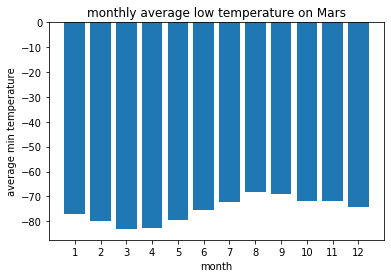

In [20]:
# Plot the average temperature by month

plt.bar(df_temperature.index, df_temperature['min_temp'], tick_label=df_temperature.index)
plt.xticks(df_temperature.index)
plt.xlabel('month')
plt.ylabel('average min temperature')
plt.title('monthly average low temperature on Mars')
plt.show()


In [23]:
# Identify the coldest and hottest months in Curiosity's location

coldest = list(average_low_temp.nsmallest(1).index)
hotest = list(average_low_temp.nlargest(1).index)


print(f'The coldest month on Mars is the {coldest[0]}rd month while the hotest month is the {hotest[0]}th month.')


The coldest month on Mars is the 3rd month while the hotest month is the 8th month.


In [24]:
# 4. Average pressure by Martian month

average_pressure = mars_df['pressure'].groupby(mars_df['month']).mean()

df_pressure = pd.DataFrame(average_pressure)

df_pressure


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


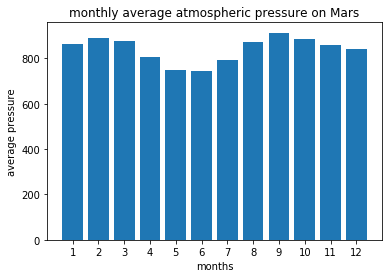

In [25]:
# Plot the average pressure by month

plt.bar(df_pressure.index, df_pressure['pressure'], tick_label=df_pressure.index)
plt.xlabel('months')
plt.ylabel('average pressure')
plt.title('monthly average atmospheric pressure on Mars')
plt.show()


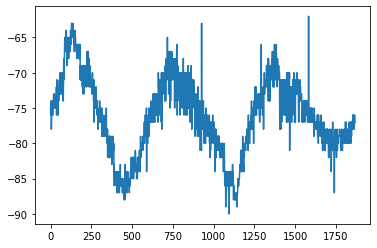

In [26]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Visually estimate the result by plotting the daily minimum temperature.

mars_df.min_temp.plot()

The distance from peak to peak is roughly 1425-750, or 675 days.
A year on Mars appears to be about 675 days from the plot.
Internet search confirms that a Mars year is equivalent to 687 earth days.

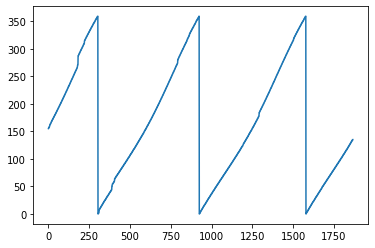

In [27]:
# We could also visually estimate the result by plotting the solar longitude as shown below.

mars_df.ls.plot()

In [28]:
mars_df[mars_df['ls']==0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


The distance from the 'zero solar longitude' points are aproximately 668 days. We could also assume that this would be the numbers of days on a mars' year. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV

mars_df.to_csv('../data-collection-challenge/mars_data.csv')


In [30]:
browser.quit()